# Lending club case Study

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings (action='ignore')

In [ ]:
#Accessing Google Drive from Google colab
#You can use the drive module from google.colab to mount your entire Google Drive to Colab
#Executing the below code , some messages will be prompted:
#Select the Google Drive Account you want to mount 
#Select “Allow” 
#Once the Drive is mounted, you’ll get the message “Mounted at /content/gdrive”, and you’ll be able to browse through the contents of your Drive from the file-explorer pane.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Get path of csv file
path = "/content/drive/MyDrive/Colab Notebooks/loan.csv"

In [ ]:
#Importing the data
df0 = pd.read_csv(path)
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [ ]:

##df0  = pd.read_csv("file:///E:/Lending%20club/loan.csv")
##df0.info()

In [ ]:
df0.drop_duplicates()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df0.isnull().sum().sum()

2263364

In [ ]:
df0.shape


(39717, 111)

In [ ]:
df1=df0
df1=df1.dropna(how="all",axis=1)

In [ ]:
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [ ]:
df1.shape

(39717, 57)

dropping columns with single values(they have only 0 or NA)

In [ ]:
df1.drop(["recoveries","collection_recovery_fee","policy_code","application_type","acc_now_delinq","chargeoff_within_12_mths",
         "delinq_amnt","tax_liens","out_prncp","out_prncp_inv","collections_12_mths_ex_med"],axis=1,inplace=True)

In [ ]:
df1.shape

(39717, 46)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39717 non-null  int64  
 1   member_id               39717 non-null  int64  
 2   loan_amnt               39717 non-null  int64  
 3   funded_amnt             39717 non-null  int64  
 4   funded_amnt_inv         39717 non-null  float64
 5   term                    39717 non-null  object 
 6   int_rate                39717 non-null  object 
 7   installment             39717 non-null  float64
 8   grade                   39717 non-null  object 
 9   sub_grade               39717 non-null  object 
 10  emp_title               37258 non-null  object 
 11  emp_length              38642 non-null  object 
 12  home_ownership          39717 non-null  object 
 13  annual_inc              39717 non-null  float64
 14  verification_status     39717 non-null

### Now we have 46 columns out of which some correspond to the post approval of loan

 
- We are analyzing the user details and the driving factors of loan defaulting before approving loan.
- So we can safely remove the columns / variables corresponding to that scenario.
- droppin columns "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d"
- dropping description column since we cannot extract any useful infromation from such column

In [ ]:
df1.drop(["id", "member_id", "url", "title","desc", "emp_title", "zip_code", "last_credit_pull_d"],axis=1,inplace=True)

In [ ]:
df1.shape

(39717, 38)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt             39717 non-null  int64  
 2   funded_amnt_inv         39717 non-null  float64
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_length              38642 non-null  object 
 9   home_ownership          39717 non-null  object 
 10  annual_inc              39717 non-null  float64
 11  verification_status     39717 non-null  object 
 12  issue_d                 39717 non-null  object 
 13  loan_status             39717 non-null  object 
 14  pymnt_plan              39717 non-null

In [ ]:
df1["mths_since_last_record"].value_counts()

0.0      670
104.0     61
89.0      60
113.0     59
111.0     57
        ... 
19.0       1
20.0       1
120.0      1
129.0      1
5.0        1
Name: mths_since_last_record, Length: 111, dtype: int64

## People who have already deafulted on loans - are not likely to pay loans in future


In [ ]:
NPA=df1[(df1["loan_status"]=="Charged Off")]

##### since public recorded bankruptcies have 697 null values we tried to gauge , why they are null - its mostly because they might not have been public recorded bankruptcies so null values may be imputed to 0

In [ ]:
df2=df1
df2["pub_rec_bankruptcies"]= df2["pub_rec_bankruptcies"].fillna(df2["pub_rec_bankruptcies"].mode()[0])

In [ ]:
df2.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'pub_rec_bankruptcies'],
      dtype='object')

- 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
- 'term', 'int_rate',
- 'grade', 'sub_grade'
- 'emp_length','home_ownership', 'annual_inc'
- 'installment', , , ,
- 'verification_status', , 'loan_status',
- 'issue_d
- 'mths_since_last_delinq , 'addr_state', 
- 'dti', 'delinq_2yrs',
- 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
- 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
- 'revol_util', 'total_acc', , 'total_pymnt',
- 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
- 'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
- 'pub_rec_bankruptcies'

In [ ]:
df2["purpose"].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [ ]:
df2["initial_list_status"].value_counts()

f    39717
Name: initial_list_status, dtype: int64

#### Dropping the  columns since they have same value for all records hence wont make any differnce if they are used or not 
- pymnt_plan
- initial_list_status

In [ ]:
df2.drop(["initial_list_status","pymnt_plan"],axis=1,inplace= True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt             39717 non-null  int64  
 2   funded_amnt_inv         39717 non-null  float64
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_length              38642 non-null  object 
 9   home_ownership          39717 non-null  object 
 10  annual_inc              39717 non-null  float64
 11  verification_status     39717 non-null  object 
 12  issue_d                 39717 non-null  object 
 13  loan_status             39717 non-null  object 
 14  purpose                 39717 non-null

In [ ]:
df2 = df2[df2.loan_status != "Current"]
df2.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [ ]:
df2["int_rate"]=df2["int_rate"].map(lambda x : x.strip('%'))

In [ ]:
df2["int_rate"]

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: object

In [ ]:
df2["int_rate"].value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: int_rate, Length: 370, dtype: int64

In [ ]:
df2["term"]

0         36 months
1         60 months
2         36 months
3         36 months
5         36 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 38577, dtype: object

In [ ]:
df2["term"]=df2["term"].map(lambda x : x.strip(' months'))

In [ ]:
df2['term']

0        36
1        60
2        36
3        36
5        36
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 38577, dtype: object

In [ ]:
df2["installment"]

0        162.87
1         59.83
2         84.33
3        339.31
5        156.46
          ...  
39712     78.42
39713    275.38
39714    156.84
39715    155.38
39716    255.43
Name: installment, Length: 38577, dtype: float64

In [ ]:
df2["home_ownership"].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [ ]:
df2["purpose"].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [ ]:
df2["mths_since_last_delinq"].value_counts()

0.0      443
15.0     244
23.0     243
30.0     243
24.0     236
        ... 
107.0      1
85.0       1
97.0       1
95.0       1
115.0      1
Name: mths_since_last_delinq, Length: 95, dtype: int64

In [ ]:
df2["mths_since_last_record"].value_counts()

0.0      670
104.0     60
113.0     58
89.0      57
111.0     56
        ... 
14.0       1
46.0       1
7.0        1
83.0       1
5.0        1
Name: mths_since_last_record, Length: 111, dtype: int64

In [ ]:
df2["open_acc"].value_counts()

7     3909
6     3846
8     3814
9     3607
5     3111
10    3097
11    2666
4     2300
12    2198
13    1855
3     1470
14    1427
15    1146
16     908
17     716
2      596
18     516
19     384
20     281
21     235
22     137
23      93
24      75
25      53
26      34
28      24
27      22
30      15
29      13
31       7
34       5
35       4
32       3
33       3
36       2
39       1
38       1
44       1
41       1
42       1
Name: open_acc, dtype: int64

In [ ]:
df2["revol_util"].value_counts()

0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: revol_util, Length: 1088, dtype: int64

In [ ]:
#922 records where the peope have not utilized their credit 
#we have to strip the % sign to make the data meaningful

## 

In [ ]:
df2['revol_util'] = df2['revol_util'].str.replace('%','').astype(float)

In [ ]:
df2['revol_util']

0        83.7
1         9.4
2        98.5
3        21.0
5        28.3
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 38577, dtype: float64

In [ ]:
df2['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [ ]:
#df2["emp_length"]=df2["emp_length"].map(lambda x: 0 if x=='10+ years' else 0 (if x=='< 1 year'))

In [ ]:
df2["emp_length"]=df2["emp_length"].astype(str)

In [ ]:
df2["emp_length"]=df2["emp_length"].map(lambda x: x.strip('years'))

In [ ]:
df3=df0

In [ ]:
df3['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [ ]:
df3['emp_length']=df3['emp_length'].astype(str)

In [ ]:
df3["emp_length"]=df3["emp_length"].map(lambda x:  x.replace("+","").replace("< ","").replace("years","").replace("year",""))

In [ ]:
df3['emp_length'].value_counts()

10     8879
1      7823
2      4388
3      4095
4      3436
5      3282
6      2229
7      1773
8      1479
9      1258
nan    1075
Name: emp_length, dtype: int64

In [ ]:
df3["emp_length"]=df3["emp_length"].map(lambda x:  x.replace("+","").replace("< ","").replace("years",""))

In [ ]:
df2['emp_length']=df2['emp_length'].astype(str)

In [ ]:
df2['emp_length'].dtype

dtype('O')

In [ ]:
df2["emp_length"]=df2["emp_length"].map(lambda x:  x.replace("+",""))

In [ ]:
df2["emp_length"]=df2["emp_length"].map(lambda x:  x.replace("< ","").replace("+","").replace("years","").replace("year",""))

In [ ]:
df2["emp_length"].value_counts()

10     8488
1      7677
2      4291
3      4012
4      3342
5      3194
6      2168
7      1711
8      1435
9      1226
nan    1033
Name: emp_length, dtype: int64

In [ ]:
df2["emp_length"]=df2["emp_length"].replace("nan",0)

In [ ]:
df2["emp_length"]=pd.to_numeric(df2["emp_length"])
df2["emp_length"].value_counts()

10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
0     1033
Name: emp_length, dtype: int64

## Outlier Treatment

In [ ]:
df2["annual_inc"].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [ ]:
df2["annual_inc"]=df2["annual_inc"].astype("int64")

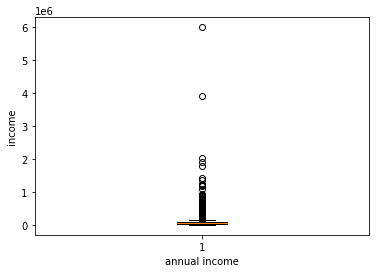

In [ ]:

plt.boxplot(df2["annual_inc"])
plt.xlabel("annual income")
plt.ylabel("income")
plt.show()

In [ ]:
df2["annual_inc"].quantile(0.95)

140004.0

In [ ]:
df2=df2[(df2["annual_inc"]<=140000)]

In [ ]:
df2.shape # so now we have reduced 549 records as they are kind of outliers

(36642, 36)

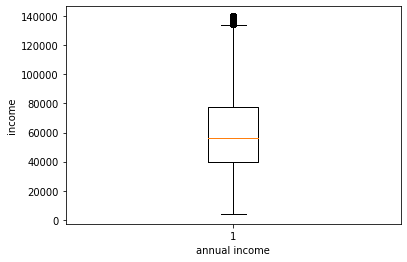

In [ ]:
plt.boxplot(df2["annual_inc"])
plt.xlabel("annual income")
plt.ylabel("income")
plt.show()

### Now the "annual_inc" data looks good and proceeding next.
- Let's analyze other numerical variables which could possibly have outliers.
- loan_amnt 
- dti
- funded_amnt_inv 
- funded_amnt

In [ ]:
df2["loan_amnt"].describe()

count    36642.000000
mean     10681.045658
std       7047.619569
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [ ]:
df2["loan_amnt"].quantile(0.95)

25000.0

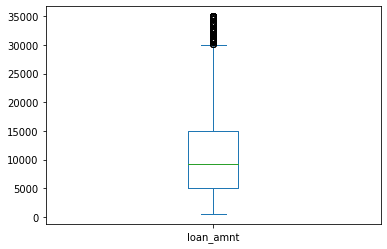

In [ ]:
df2["loan_amnt"].plot.box()

In [ ]:
df2["loan_amnt"].quantile(0.95)

25000.0

In [ ]:
df2=df2[(df2["loan_amnt"]<=25000)]

In [ ]:
df2.shape

(35526, 36)

In [ ]:
df2["dti"].describe()

count    35526.000000
mean        13.406332
std          6.660756
min          0.000000
25%          8.300000
50%         13.520000
75%         18.680000
max         29.990000
Name: dti, dtype: float64

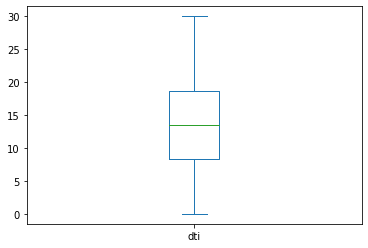

In [ ]:
df2["dti"].plot.box()

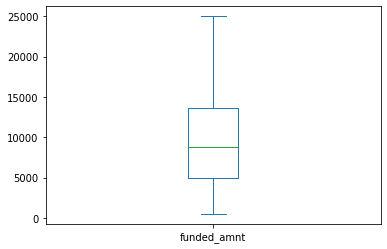

In [ ]:
df2["funded_amnt"].plot.box()

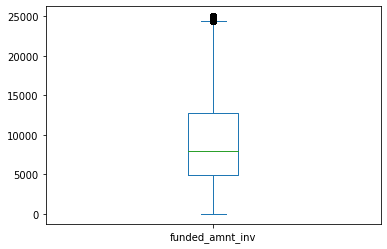

In [ ]:
df2["funded_amnt_inv"].plot.box()

In [ ]:
df2.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
df2["delinq_2yrs"].value_counts()

0     31690
1      2947
2       597
3       199
4        57
5        18
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

## Analysing data 

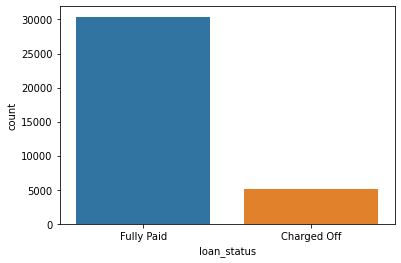

In [ ]:
sns.countplot(x = 'loan_status', data = df2)

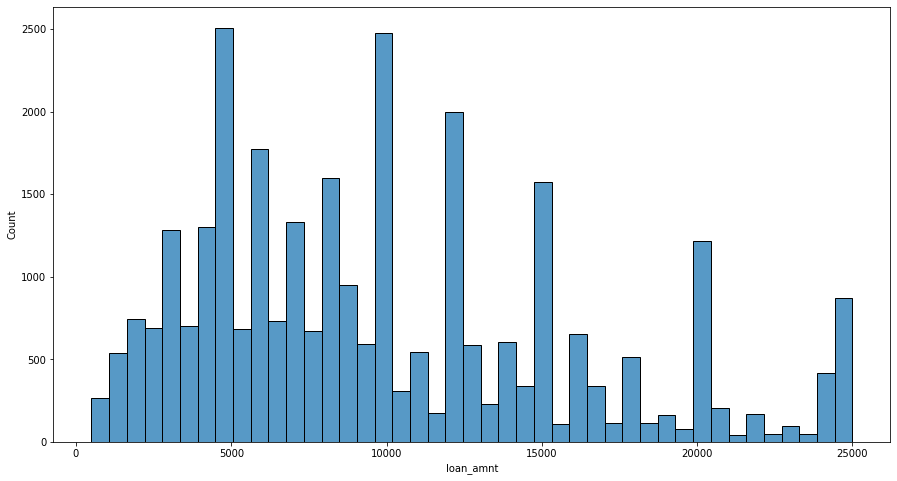

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(x='loan_amnt',data=df2[(df2["loan_status"]=='Fully Paid')])

as we can se maximum loan is of 10k-11k, approx 2500 people have got loan for that amount have paid their loan

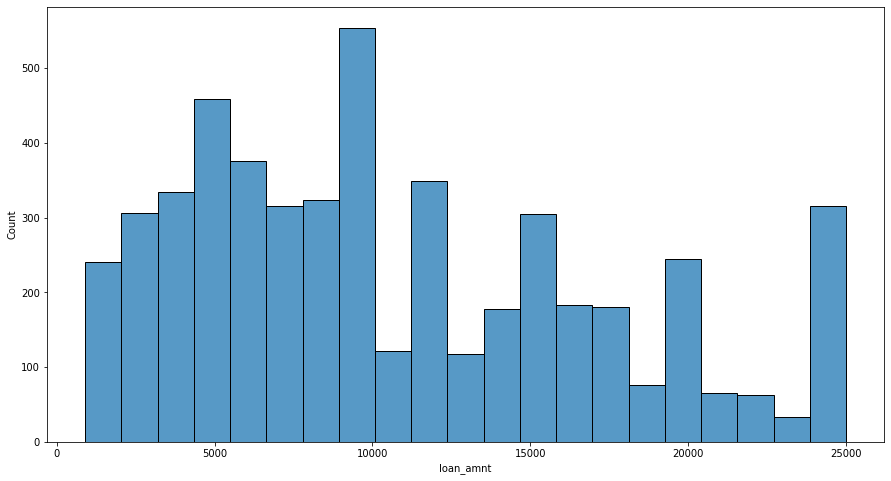

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(x='loan_amnt',data=df2[(df2["loan_status"]=='Charged Off')])

people who took loan around 5k-15k could not pay their laon

In [ ]:
df2.loan_amnt.value_counts()

10000    2686
12000    2147
5000     1979
6000     1835
15000    1713
         ... 
1650        1
18875       1
14850       1
14350       1
21300       1
Name: loan_amnt, Length: 771, dtype: int64

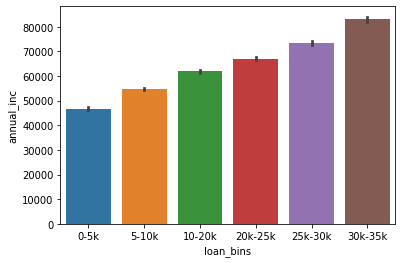

In [ ]:
df2["loan_bins"]=pd.cut(df2["loan_amnt"],bins=6,precision=0,labels=['0-5k','5-10k','10-20k','20k-25k','25k-30k','30k-35k'])
sns.barplot(x=df2["loan_bins"] , y=df2["annual_inc"])

As observed the loan amount increases with the annual income- so people who are taking higher loan are generally from higher income category

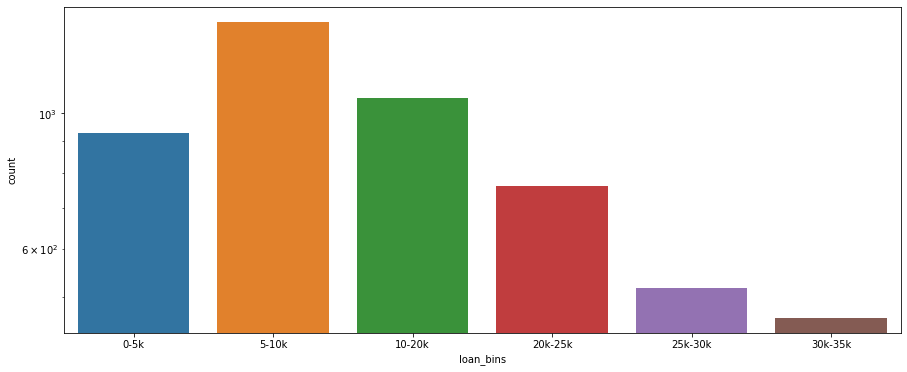

In [ ]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_bins', data=df2[df2['loan_status']=='Charged Off'])

Maximum No of people to default on the loans are those given loan between 5-10k

In [ ]:
df2['int_rate']=df2['int_rate'].astype(float)

In [ ]:

df2['int_bins'] = pd.cut(df2['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])

In [ ]:
df2["int_bins"]

0         9%-13%
1        13%-17%
2        13%-17%
3        13%-17%
5          5%-9%
          ...   
39711      5%-9%
39712      5%-9%
39713     9%-13%
39714      5%-9%
39716    13%-17%
Name: int_bins, Length: 35526, dtype: category
Categories (5, object): ['5%-9%' < '9%-13%' < '13%-17%' < '17%-21%' < '21%-24%']

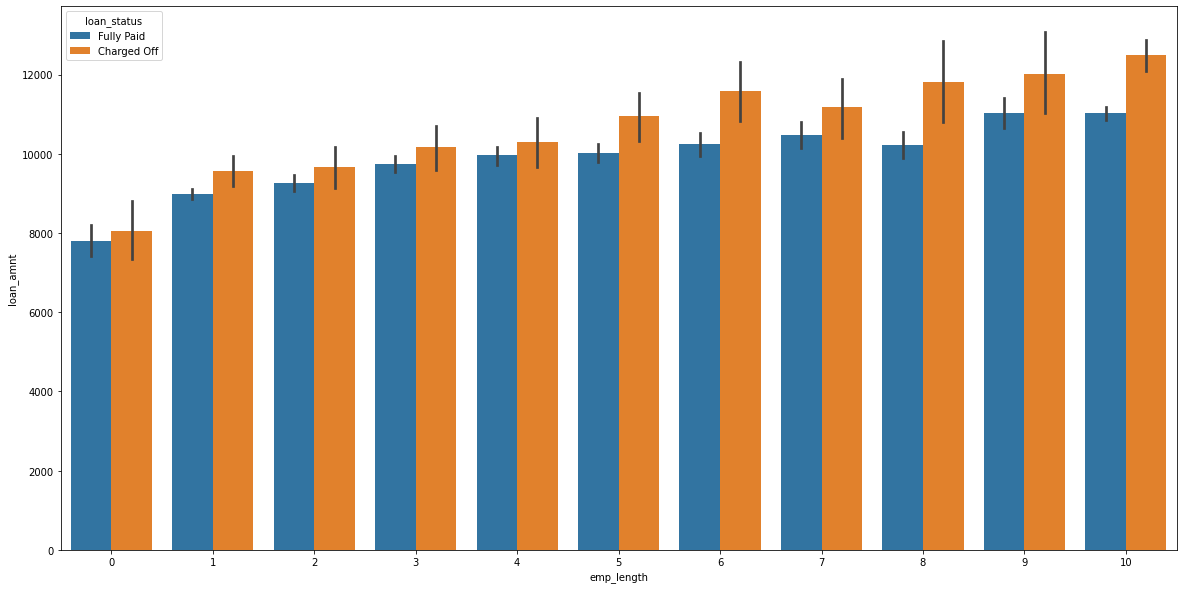

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot( data =df2, x='emp_length', y='loan_amnt', hue ='loan_status')


In [ ]:
#people not able to pay the loan increases with their employment length 

In [ ]:
df2.sub_grade = pd.to_numeric(df2.sub_grade.apply(lambda x : x[-1]))
df2.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

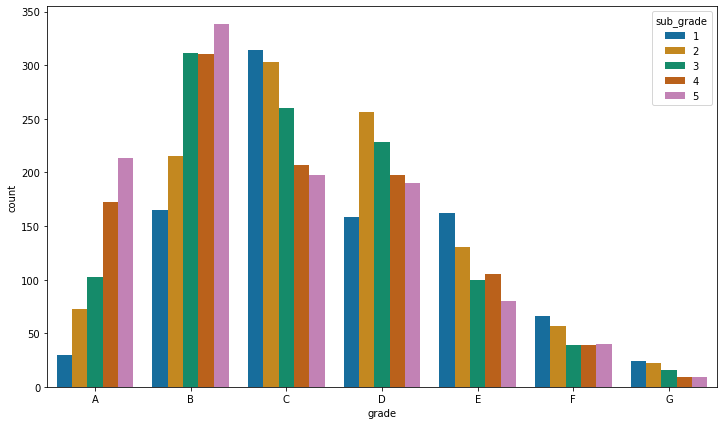

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = df2
              [df2.loan_status == 'Charged Off'])

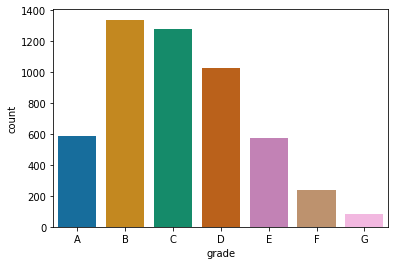

In [ ]:
sns.countplot(x = 'grade', data = df2[df2.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

####  Analyzing home_ownership

In [ ]:
#checking unique values for home_ownership
df2['home_ownership'].unique()


array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

#### There are only 3 records with 'NONE' value in the data. So replacing the value with 'OTHER'

In [ ]:
#replacing 'NONE' with 'OTHERS'
df2['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [ ]:
#checking unique values for home_ownership again
df2['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

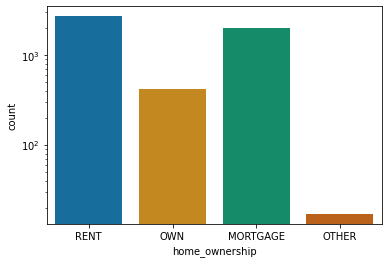

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=df2[df2['loan_status']=='Charged Off'])

####  Analyzing purpose

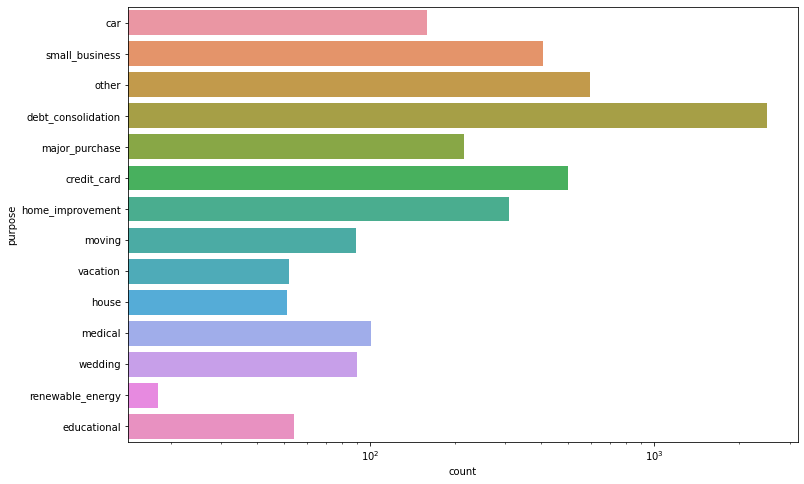

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=df2[df2.loan_status == 'Charged Off'])

#### Analyzing interest rate wrt the interest rate bins created

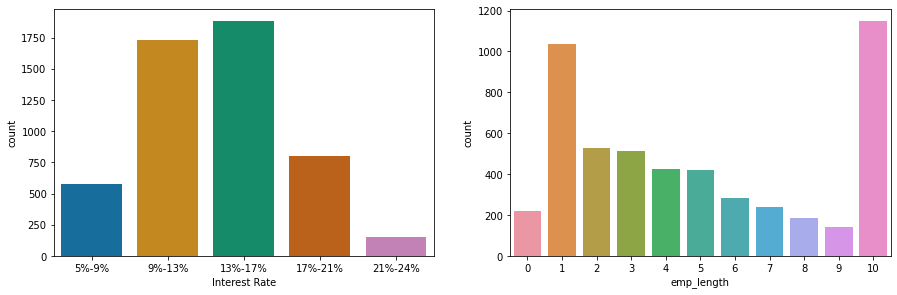

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_bins', data=df2[df2.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=df2[df2.loan_status == 'Charged Off'])

In [ ]:
df2['open_acc_bins'] = pd.cut(df2['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
df2['revol_util_bins'] = pd.cut(df2['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
df2['total_acc_bins'] = pd.cut(df2['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
df2['annual_inc_bins'] = pd.cut(df2['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

#### Similarly analyzing open_acc,revol_util,total_acc,annual_inc

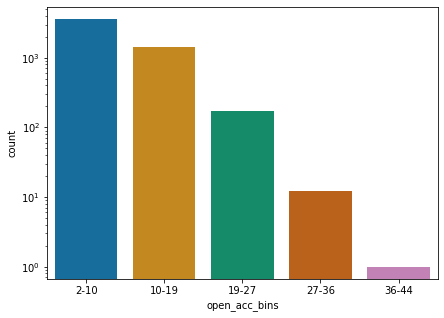

In [ ]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_bins', data=df2[df2.loan_status == 'Charged Off'])

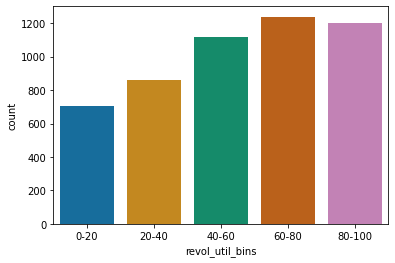

In [ ]:
sns.countplot(x='revol_util_bins', data=df2[df2.loan_status == 'Charged Off'])

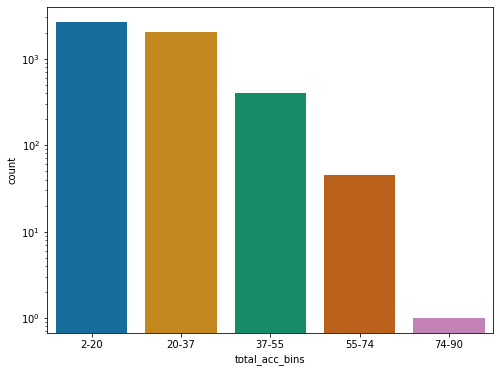

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_bins', data=df2[df2.loan_status == 'Charged Off'])

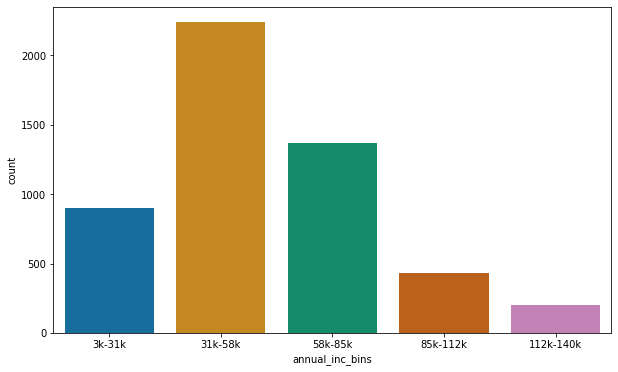

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_bins', data=df2[df2.loan_status == 'Charged Off'])

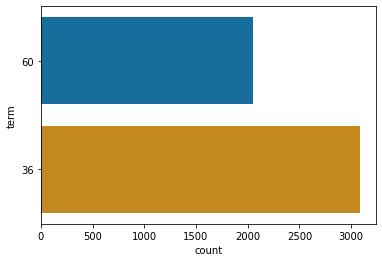

In [ ]:
sns.countplot(y='term', data=df2[df2['loan_status']=='Charged Off'])

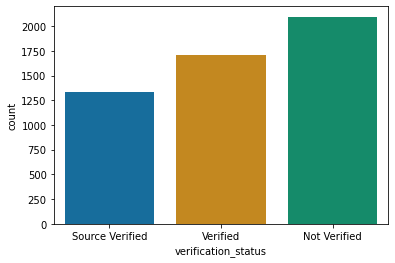

In [ ]:
sns.countplot(x='verification_status', data=df2[df2['loan_status']=='Charged Off'])

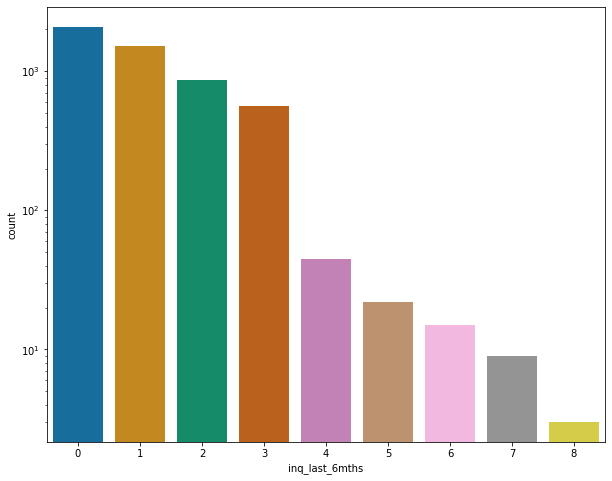

In [ ]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=df2[df2['loan_status']=='Charged Off'])

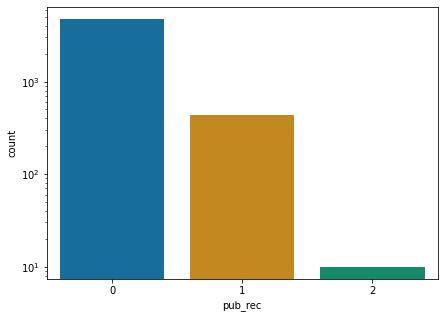

In [ ]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=df2[df2['loan_status']=='Charged Off'])

### Analyzing by issued month and year

In [ ]:
## Extracting month and year
df_month_year = df2['issue_d'].str.partition("-", True)     
df2['issue_month']=df_month_year[0]                       
df2['issue_year']='20' + df_month_year[2]

In [ ]:
df2.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,next_pymnt_d,pub_rec_bankruptcies,loan_bins,int_bins,open_acc_bins,revol_util_bins,total_acc_bins,annual_inc_bins,issue_month,issue_year
39711,5000,5000,700.0,36,8.70,158.30,B,1,5,MORTGAGE,...,NaN,0.0,5-10k,5%-9%,2-10,20-40,20-37,58k-85k,Jul,2007
39712,2500,2500,1075.0,36,8.07,78.42,A,4,4,MORTGAGE,...,NaN,0.0,0-5k,5%-9%,10-19,0-20,37-55,85k-112k,Jul,2007
39713,8500,8500,875.0,36,10.28,275.38,C,1,3,RENT,...,NaN,0.0,5-10k,9%-13%,2-10,20-40,2-20,3k-31k,Jul,2007
39714,5000,5000,1325.0,36,8.07,156.84,A,4,1,MORTGAGE,...,NaN,0.0,5-10k,5%-9%,10-19,0-20,20-37,85k-112k,Jul,2007
39716,7500,7500,800.0,36,13.75,255.43,E,2,1,OWN,...,NaN,0.0,5-10k,13%-17%,2-10,40-60,2-20,3k-31k,Jun,2007


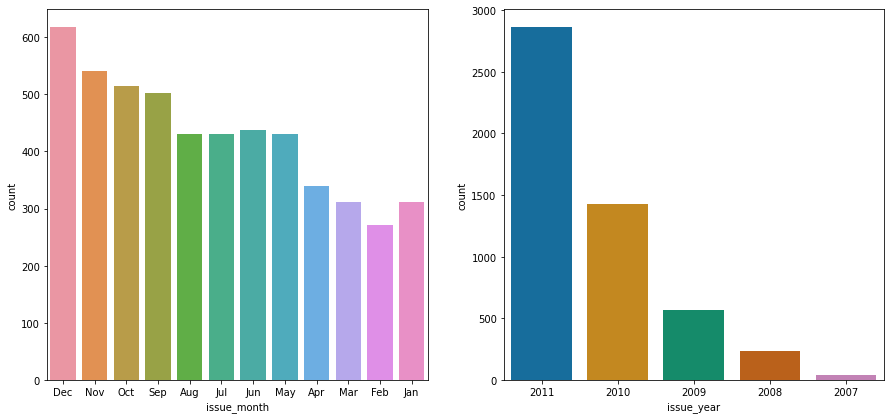

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=df2[df2['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=df2[df2['loan_status']=='Charged Off'])

### Maximum number of defaults occured when the loan was sanctioned/issued in Dec. Loan issued in the year 2011 were also as compared to other years

### Analyzing installment,dti, loan_amnt 

In [ ]:
df2['installment_bins'] = pd.cut(df2['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
df2['funded_amnt_inv_bin'] = pd.cut(df2['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) 
df2['loan_amnt_bins'] = pd.cut(df2['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
df2['dti_bins'] = pd.cut(df2['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

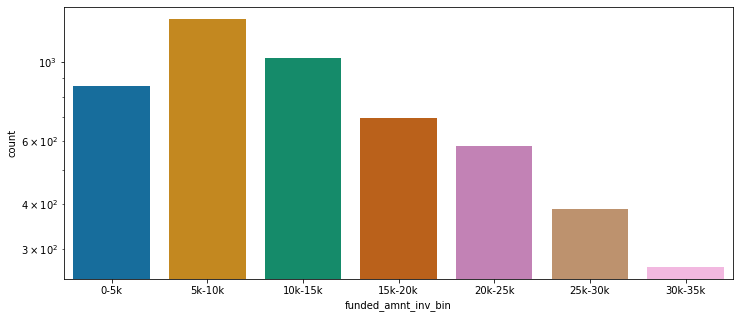

In [ ]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_bin', data=df2[df2['loan_status']=='Charged Off'])

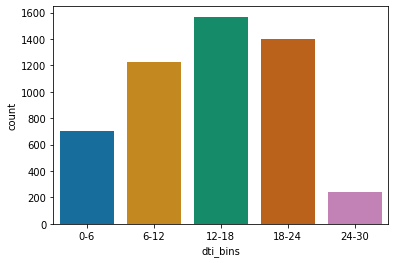

In [ ]:
sns.countplot(x='dti_bins', data=df2[df2['loan_status']=='Charged Off'])

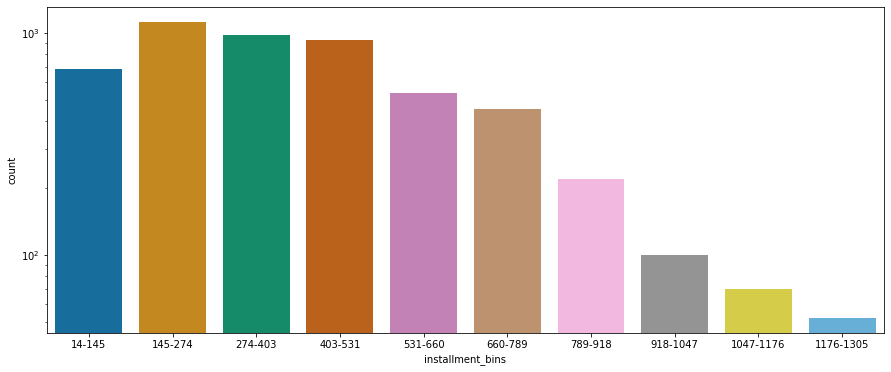

In [ ]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_bins', data=df2[df2['loan_status']=='Charged Off'])

# Observations

### The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when : 

- Applicants having house_ownership as 'RENT'
- Applicants who use the loan to clear other debts
- Applicants who receive interest at the rate of 13-17%
- Applicants who have an income of range 31k - 58k
- Applicants who have 2-10 open_acc
- Applicants with employement length of 10
- When funded amount by investor is between 5000-10000
- Loan amount is between 5429 - 10357
- Dti is between 12-18
- When monthly installments are between 145-274
- Term of 36 months
- When the loan status is Not verified
- When the no of enquiries in last 6 months is 0
- When the number of derogatory public records is 0
- When the purpose is 'debt_consolidation'
- Grade is 'B'
- And a total grade of 'B5' level.

## Analysing annual income with other columns for more insights 

#### 1.Annual income vs loan purpose

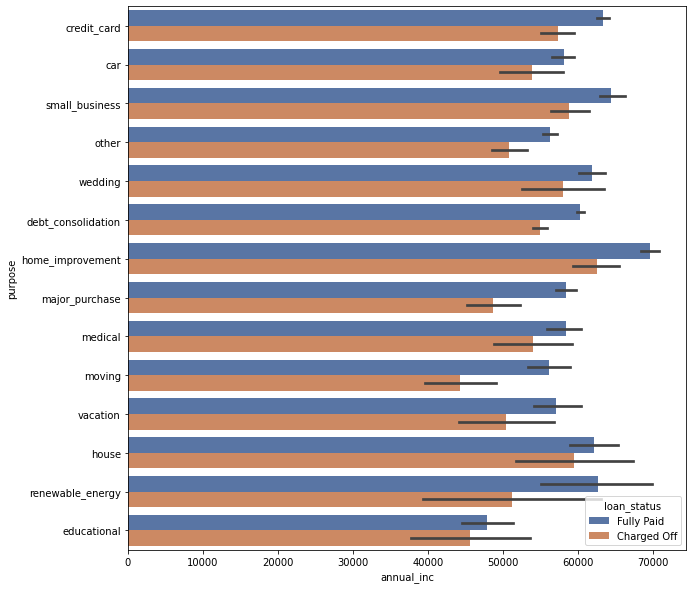

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data =df2,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

### Though the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest. 
- Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

#### 2.Annual income vs home ownership

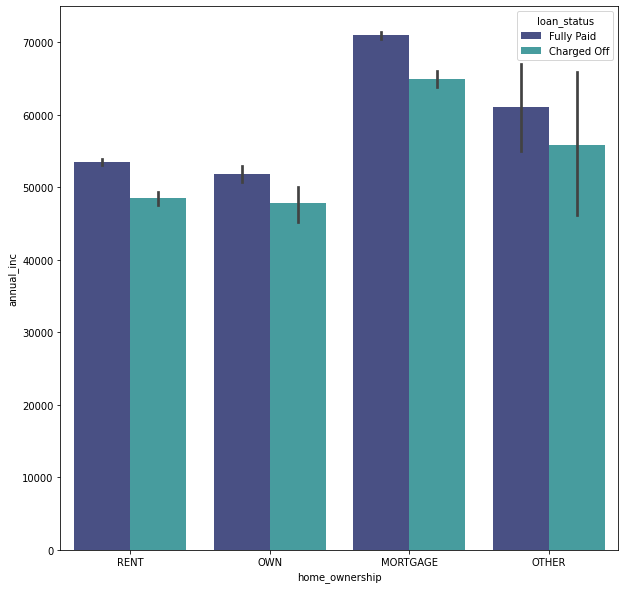

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data =df2 ,x='home_ownership', y='annual_inc', hue ='loan_status',palette="mako")
plt.show()

### Annual Income vs Loan amount

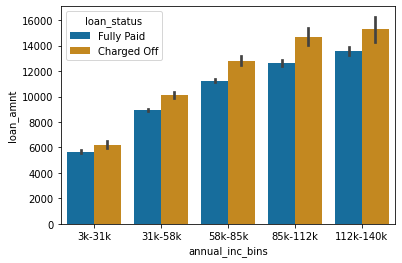

In [ ]:
sns.barplot(x = "annual_inc_bins", y = "loan_amnt", hue = 'loan_status', data = df2)

### Across all the income bins, the loan_amount is higher for people who defaulted.

#### 3. Annual income vs int_rate

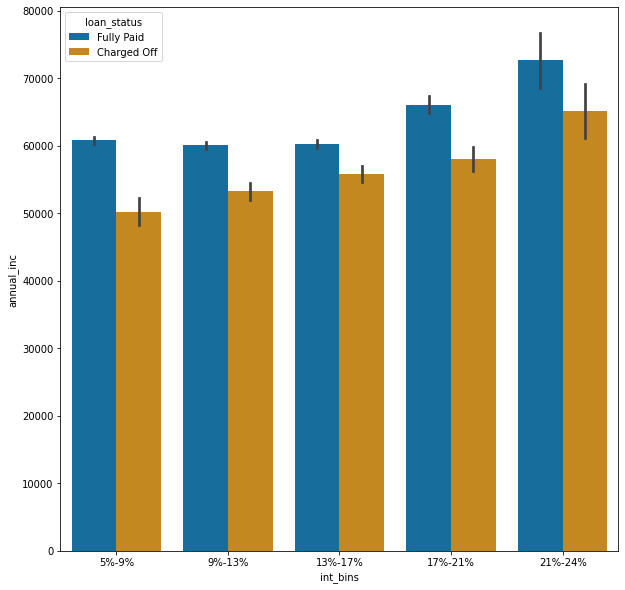

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data =df2,x='int_bins', y='annual_inc', hue ='loan_status')
plt.show()

## Analysing loan_amount with other columns for more insights 

#### 1.Loan Amount vs Interest Rate

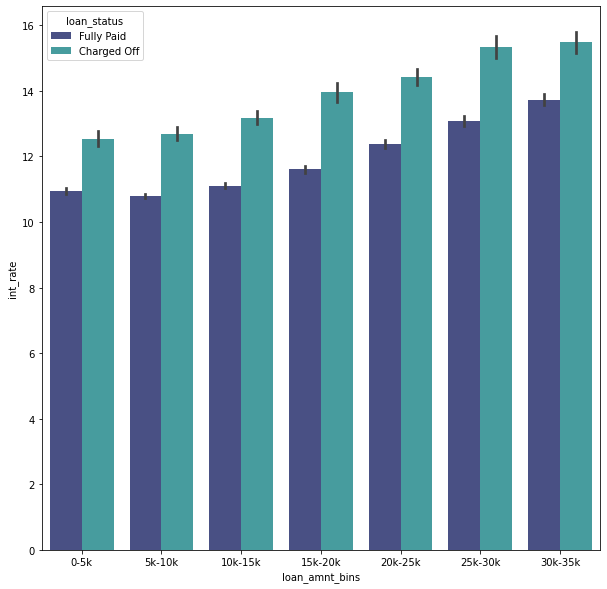

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data =df2,x='loan_amnt_bins', y='int_rate', hue ='loan_status',palette="mako")
plt.show()

#### 2.Loan vs Loan purpose

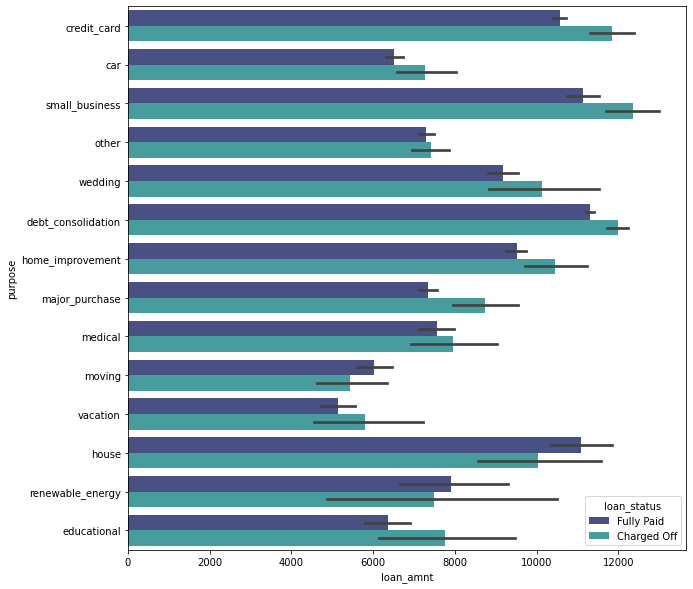

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data =df2 ,x='loan_amnt', y='purpose', hue ='loan_status',palette="mako")
plt.show()

#### 3.Loan vs House Ownership

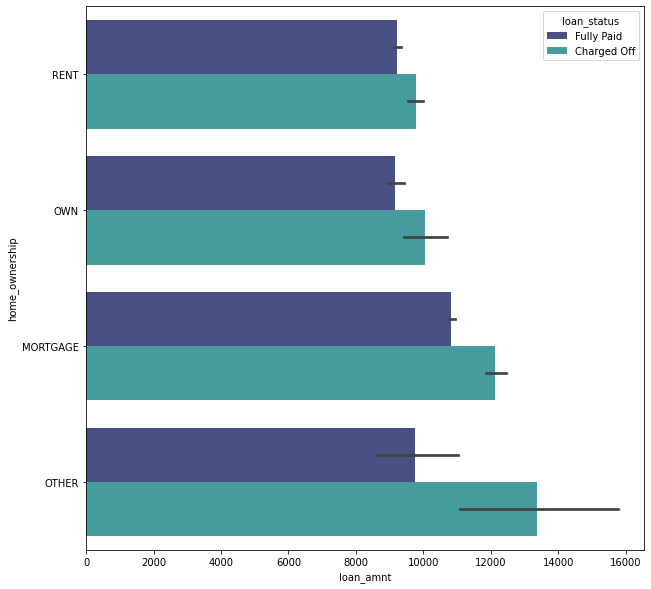

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data =df2 ,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="mako")
plt.show()

#### 4.Loan amount vs month issued and year issued

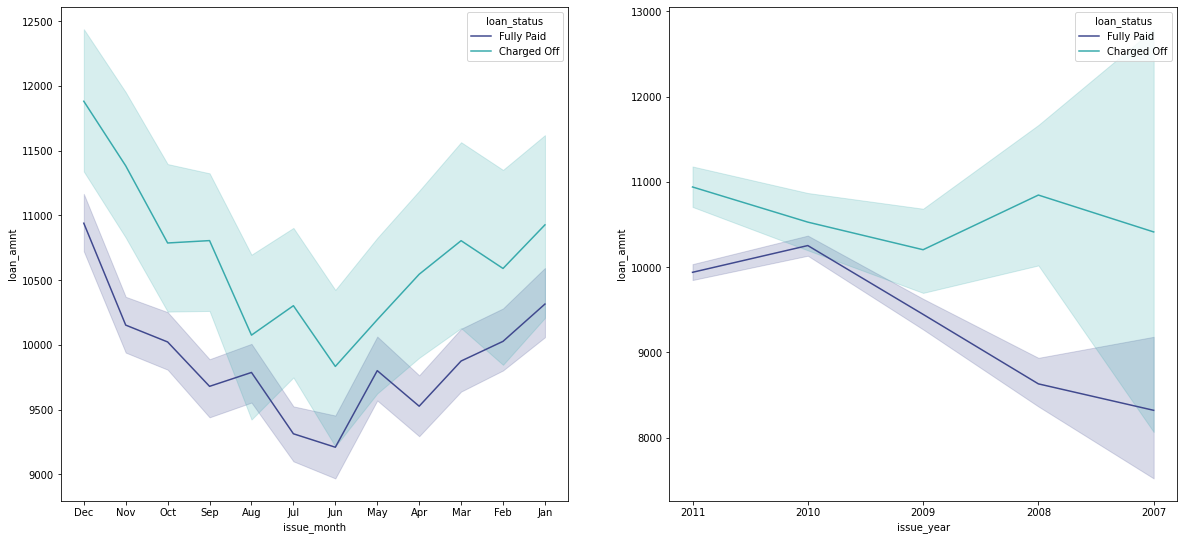

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =df2 ,y='loan_amnt', x='issue_month', hue ='loan_status',palette="mako")
plt.subplot(222)
sns.lineplot(data =df2,y='loan_amnt', x='issue_year', hue ='loan_status',palette="mako")

#### 5.Loan amount vs Grade

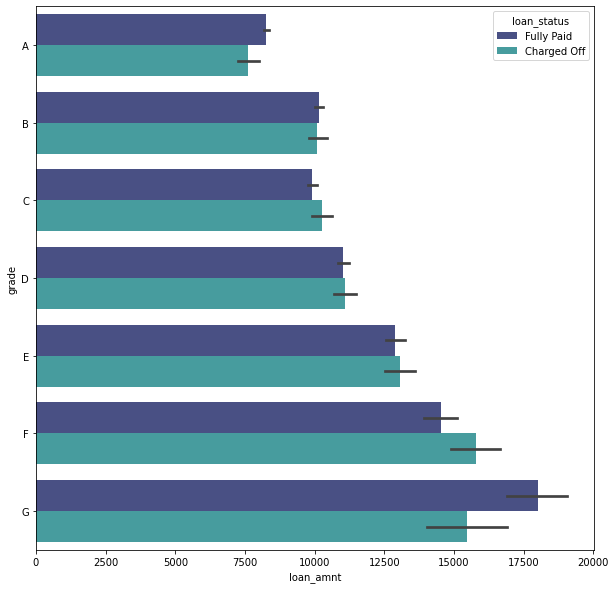

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data =df2 ,x='loan_amnt', y='grade', hue ='loan_status',palette="mako", order=['A','B','C','D','E','F','G'])
plt.show()

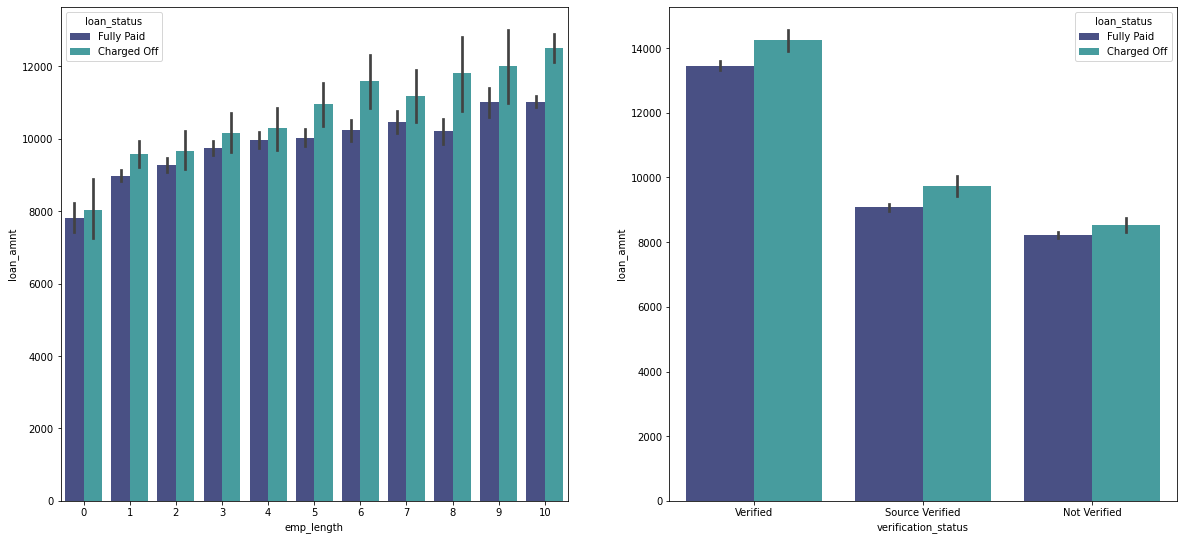

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =df2,y='loan_amnt', x='emp_length', hue ='loan_status',palette="mako")
plt.subplot(222)
sns.barplot(data =df2 ,y='loan_amnt', x='verification_status', hue ='loan_status',palette="mako")

### Employees with longer working history got the loan approved for a higher amount. 
- Looking at the verification status data,income verified loan applications tend to have higher loan amount. Which might indicate that the firms are sanctioning high loan amount for applicants whose income is verified

#### grade vs interest rate

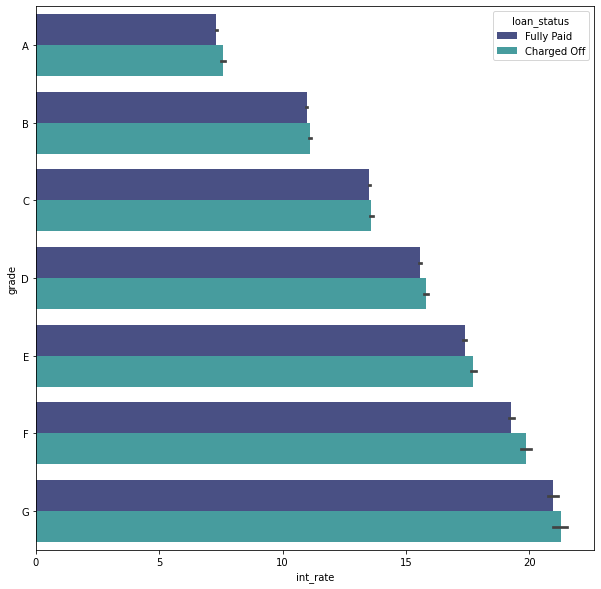

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data =df2,x='int_rate', y='grade', hue ='loan_status',palette="mako", order=['A','B','C','D','E','F','G'])
plt.show()

In [ ]:
# fig,ax = plt.subplots(figsize = (15,6))
plt.tight_layout()
sns.catplot(data =df2,y ='int_rate', x ='loan_amnt_bins', hue ='loan_status',palette="pastel",kind = 'box')

### The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount bins. 
- This can be a pretty strong driving factor for loan defaulting.

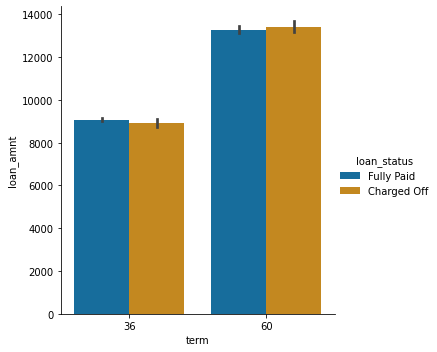

In [ ]:
sns.catplot(x = 'term', y = 'loan_amnt', data = df2,hue = 'loan_status', kind = 'bar')

### Applicants who applied and defaulted have no significant difference in loan_amounts.
- Which means that applicants applying for long term has applied for more loan. 

# Observations

### The above analysis with respect to the charged off loans. There is a more probability of defaulting when : 

- Applicants taking loan for 'home improvement' and have income of 60k -70k
- Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
- Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
- Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
- Applicants who have taken a loan for small business and the loan amount is greater than 14k
- Applicants whose home ownership is 'MORTGAGE and have loan of 12k
- When grade is F and loan amount is between 15k-20k
- When employment length is 10yrs and loan amount is 12k-14k 
- When the income is verified and loan amount is above 14k
- For grade G and interest rate above 20%